# Covid data


In [1]:
from ETL.EtlCovid import *
from ETL.EtlElection import *
from ETL.EtlVaccine import *
from Visualization.VizBase import *
from Visualization.VizCovid import *
from Visualization.VizVaccine import *
from Visualization.VizMask import *

In [2]:
#alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## Section 1a: Our Motivation


The Nigerian Igbo word “igwebuike”, which means “there is strength in community.” paraphrases the ideal response to the Covid pandemic. To build herd immunity and stop its spread, within and outside borders, a cohesive and co-operative front is called for. However, amidst this pandemic, there is a suggestion that the U.S. has never been as divided as in recent years.

In a year of **presidential elections**, the leadership rhetoric and messaging regarding Covid response and behavior, as projected by the media, appears to starkly differ along political ideological lines, specifically, Democrat versus Republican. Usage of masks, openness to vaccination and a general appreciation of the severity of the pandemic, as portrayed to the public, arouses curiosity as to whether the response is truly divided along party lines.
 
We will also explore if other factors, commonly associated with political affiliation, differentiate the response by communities towards US Centers for Disease Control guidelines. Amongst those, employment rates and the urban/rural demographic of the voting population, will be considered. 

**Questions to answer:**
Is there a significant correlation between political affiliation and population response to the COVID pandemic, and the case and death rates?
Additional analyses:
Did this trend continue during the more recent rise of the Delta variant?
Are there other factors that could have affected this correlation? Two prominent ones often mentioned with the political divide are unemployment and the urban/rural demographic.

**New article sources**

https://fortune.com/2020/11/06/trump-voters-covid-cases-red-counties-2020-election-results
An Associated Press analysis reveals that in 376 counties with the highest number of new cases per capita, the overwhelming majority—93% of those counties—went for Trump, a rate above other less severely hit areas./

Many Places Hard Hit By COVID-19 Leaned More Toward Trump In 2020 Than 2016
Support for President Trump increased in 2020 in many of the U.S. counties that lost lives at the highest rate to COVID-19, according to an NPR analysis.

Of the 100 counties with the highest COVID-19 death rates per capita, 68 had a higher proportion of votes cast for Trump this cycle than they did in 2016. This includes both Republican-leaning counties and counties that supported Joe Biden.
https://www.npr.org/sections/health-shots/2020/11/06/930897912/many-places-hard-hit-by-covid-19-leaned-more-toward-trump-in-2020-than-2016


## Section 1b: Party affiliation and Covid case trend in Presidential election year of 2020



The basis of this project began with the observations derived from the visualization below. The **task** is to determine if a there is significant difference in the rate of rise of covid cases between normalized (per 100K) populations that professes affiliation to one party or another (Republican, Democrat and Other). The **data** to be analyzed was the county level covid cases aggregated by segements derived by joining with Presidential election data from 2016 and 2020. We differentiate between populations that voted Repopublican Democrat or Other and also those that switched loyalties.

From the visualization we observed that the rate of rise of the infection was markedly higher in the population that voted Republican (remained loyal in 2020 or switched from 2016).  

**Effectiveness**:Cases are encoded using length, segemnts are encoded using color and further emphasized using stroke. Annotations are provided with a rolling tooltip as well as legend and a subtitle. 




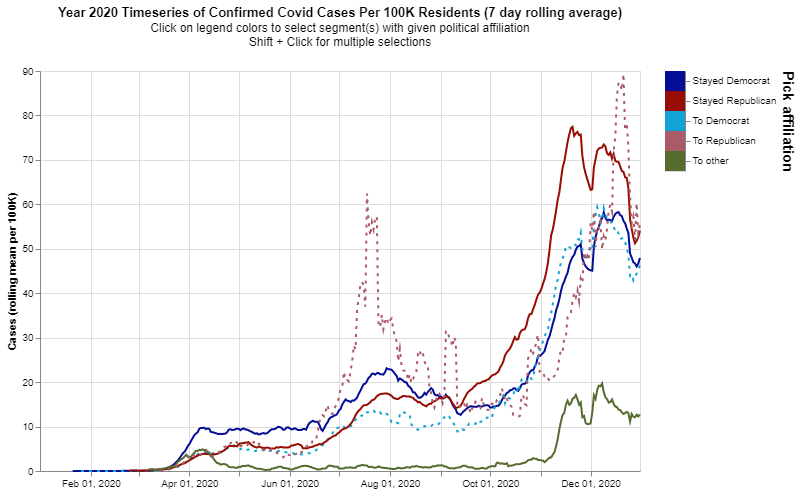

In [3]:
# Get rolling average of cases by segment
case_rolling_df = getRollingCaseAverageSegmentLevel()

# Create the chart
base, make_selector, highlight_segment, radio_select  = createCovidConfirmedTimeseriesChart(case_rolling_df)
selectors, rules, points, tooltip_text  = createTooltip(base, radio_select, case_rolling_df)


# Bring all the layers together with layering and concatenation
( alt.layer(
    highlight_segment, selectors, points,rules, tooltip_text ) | make_selector 
)



## Section 1c: Strength of affiliation and COVID deaths at County level 

To further deepen our understanding, we decided to check if the strength of affiliation as determined by the percentile point change in votes received by party in 2020 over 2016, showed any correlation to the number of deaths in that county.
In the chart below, we observe a trend in deaths rising amonfg the counties colored red (affiliation to Republican party).
When viewing the counties by Stayed Democrat and Stayed Republican, the trend is furhte emphasized by most Democrat counties lying in the quadrat with low percentile point change ad ow deaths and more Republican counties showiing 

**Effectiveness:**
Percent point change is encode by position along x axis
Average deaths per 100k is encoded by length along y axis
Annotation provided for the quarter containing higher percentile point change and higher deaths to isolate the trend.
Tooltip of county provided.
Interactivity provided so that user can select which segment they want to focus on. 


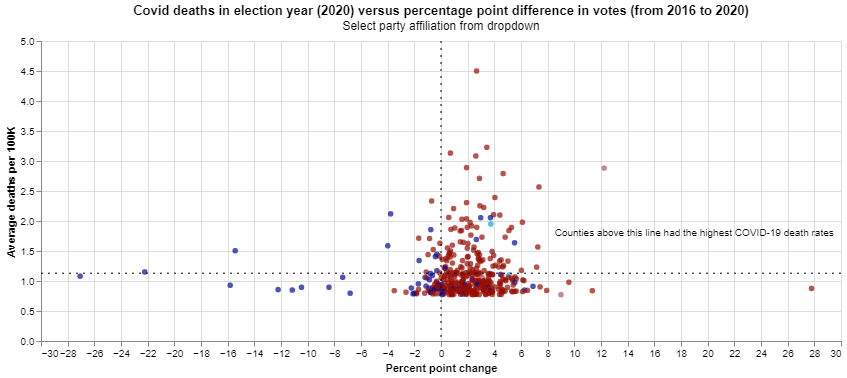

In [4]:
# Display the chart

createPercentPointChangeAvgDeathsChart()

## Section 5:  Affiliation and Vaccine Adoption Rates By State

Interactive charts allow the user to wield the power to slice and dice and pause and view the data as per questions arising when viewing the visualizations. In employing interaction in the below visual (originally seen in static form at this [NPR site](https://www.npr.org/2021/06/09/1004430257/theres-a-stark-red-blue-divide-when-it-comes-to-states-vaccination-rates), we can see that the "blue" states surged forward in vaccinations earlier than the red states. The size of the bubbles in the chart below is scaled by population to provide intuition about relation about the size of population to vaccination rate.

**Effectiveness**:
Bubble chart has state name within bubble but tooltip also provided for details on the percentages
Size of bubble scaled by population.
Color of bubble represents political affiliation.
Position along the X-axis encode the percentage population that has received at least one vaccination shot.



>Source: Data.CDC.gov [Covid-19 Vaccinaions in the United State Jurisdiction](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc)

> **DISCLAIMER** : This chart design has been borrowed from NPR
> NPT Site : (https://www.npr.org/2021/06/09/1004430257/theres-a-stark-red-blue-divide-when-it-comes-to-states-vaccination-rates) 




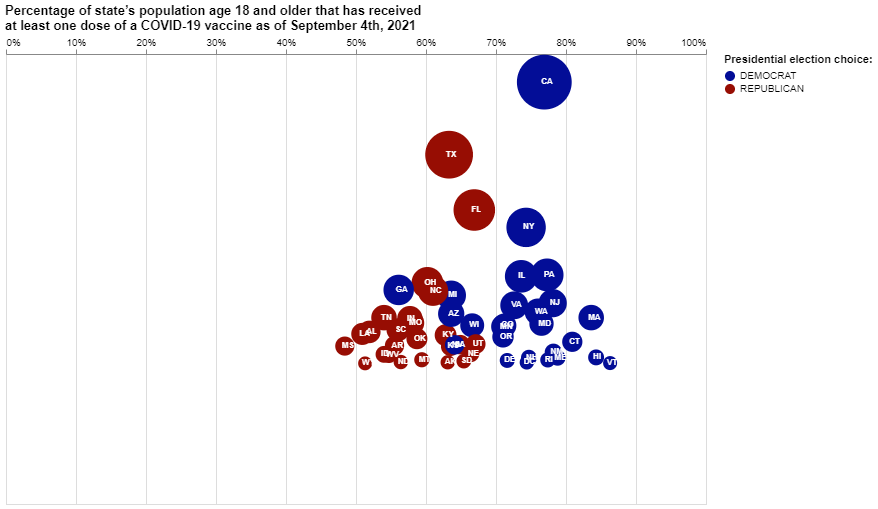

In [5]:
createDailyInteractiveVaccinationChart()




## Vaccinations and the Delta Variant Case Resurgence

The chart below allows for selection of a state in the map to learn about case trend for the period after the first Delta variant was detected in the US. The US average and per party averages are also plotted for baseline comparison.


Efficacy of the vaccine over time, for this pandemic, can only be measured as time progresses, since we do not have a precedent. Mutation of the virus is inevitable and immunity response is constantly being monitored. The below visualization presents the resurgence in Covid cases that are observed to be rising especially in states with low adoption. We compare an individual state's trend with mean trends pertaining to the US, combined mean of states that voted Republican and states that voted Democrat. It was noted that the resurgent rising trends were notably seen in states such as Louisiana, Missouri, and Florida where the numbers rose well above all the means. These are "red" states. Vermont has a high vaccination adoption and a notably lower trend. Most of the states that voted Democrat also have trends closer to their mean.

It can also be noted that with more vaccination adoption 

**Effectiveness:**
- Color map used to show relative differerence in vaccination percentage in a spatial encoding of States.
- Tooltip provided for name of state and value of vaccination percent.
- Choice of state filters timeseries chart for ability to compare state with the mean trend in US and among states that voted Republican and Democrat.
- Timeseries chart uses color to distinguish political affilitian and shape to distinguish mea trend from individual state tren.
- Tooltip provided in timeseries for comparison with mean and actual percentage by date.




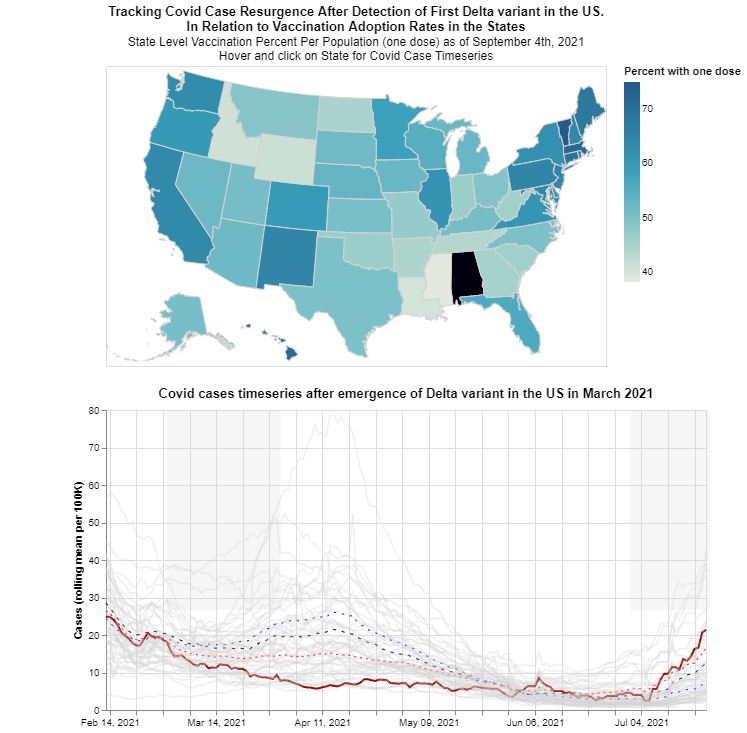

In [6]:
# Put the five layers into a chart and bind the data

vaccine_chart, us_timeseries, stayed_democrat_timeseries,\
stayed_republican_timeseries,state_cases_delta_chart,\
state_selectors, rules, tooltip_text1,\
tooltip_text2, tooltip_text3, tooltip_text4, tooltip_text5,\
points, rect_area, delta_rect_area = createCombinedVaccinationAndDeltaVariantTrend()

vaccine_chart & alt.layer(
    (state_cases_delta_chart + 
     us_timeseries + 
     stayed_democrat_timeseries +
     stayed_republican_timeseries+
     rect_area + delta_rect_area), 
     state_selectors, rules, tooltip_text1, 
      tooltip_text2, tooltip_text3, tooltip_text4, tooltip_text5,
    points
).properties(
    width=600, height=300
)

## Frequent and Infrequent Mask Usage by Political affiliation

Mask usage data was collected in a survey by New York Times (through a professional survey firm). The data was gathered from 250,000 people surveyed in a two week period in July 2020 (please see details in Addendum). The five choices offered: Never, Rarely, Sometimes, Frequently Always. The estimations of all five for every county, provided as a float adds up to 1. This was segments into Not Frequent (Never, Rarely, Sometimes) and Infrequent (Frequently Always) usage which for every county now adds to 1. 

To paint a clear picture of the propensity to wear a mask among the populace segmented by political affilition, we ploteed the distribution of mask usage estimation. We see that relatively, there is a higher probability of mask usage amog the Democrats over the Republican.

The spatial map delivered a sense of a general acceptance of CDC masking guidelines in the well-populated areas along the east and west urban coast of the US. (Select Democrat/Republican - High Mask usage in Frequent mask usage chart).
In the heartland, a tendency to overlook this guidelines is found with more people surveyed responded to the survey admitting to Never using a mask. (Select Democrat/Republican Low mask usage in Infrequent mask usage chart). 


**Effectiveness:**
Spatial representation of data showing counties in Frequent and Infrequent mask usage charts
Color hue of mask usage is separated by political affiliation.
Range of mask usage as low, moderate and high percentage ranges is depicted by color saturation that is explained in the legend. 

The cumulative averages for frequent and in frequent mask usage is shown in bar charts, reading which shows, Republicans are less likely to favor mask wearing over Democrats.


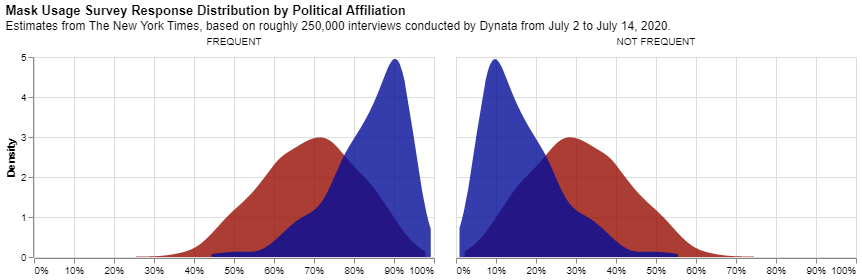

In [7]:
createMaskUsageDistributionChart()

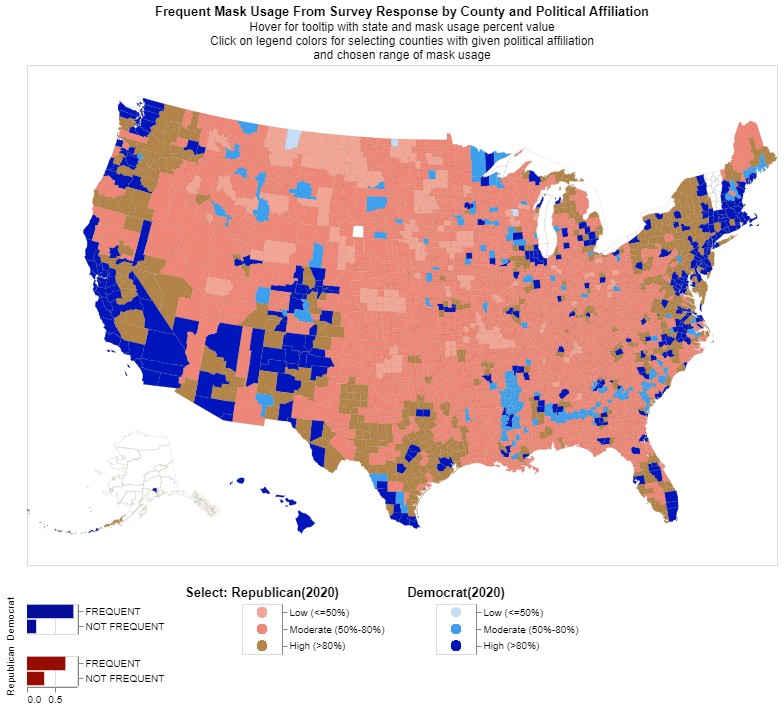

In [8]:
#createCombinedElectoralAndMaskUsageCharts().configure_view(strokeOpacity=0)
county_mask_chart, legend_republican, legend_democrat, average_mask_chart =\
createFreqCountyMaskUsageWithRanges('FREQUENT')
(
    ( county_mask_chart) &
    ( average_mask_chart | legend_republican | legend_democrat  
    ).resolve_scale(
                    color="independent"
                    )
)
  

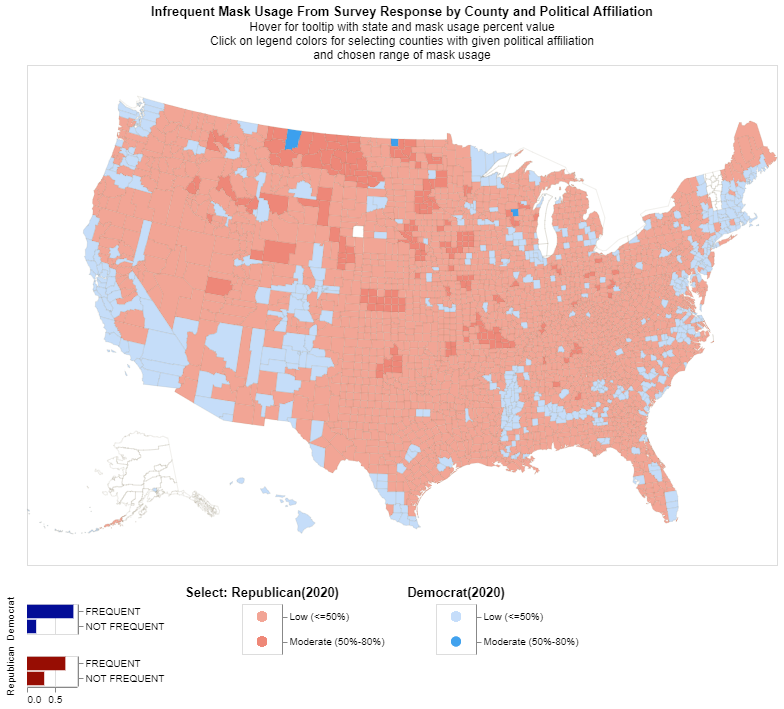

In [9]:
#createCombinedElectoralAndMaskUsageCharts().configure_view(strokeOpacity=0)
county_mask_chart, legend_republican, legend_democrat, average_mask_chart =\
createFreqCountyMaskUsageWithRanges('INFREQUENT')
(
    ( county_mask_chart) &
    ( average_mask_chart | legend_republican | legend_democrat  
    ).resolve_scale(
                    color="independent"
                    )
)
  

 ### Dependencies 
 
 
Gathered with the commands:

 %load_ext watermark
 
 %watermark -v -m -p pandas,ipywidgets,plotly,altair



    CPython 3.7.7
    IPython 7.19.0

    pandas 1.1.0
    ipywidgets 7.5.1
    plotly 4.12.0
    altair 4.1.0

    compiler   : MSC v.1900 64 bit (AMD64)
    system     : Windows
    release    : 10
    machine    : AMD64
    processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
    CPU cores  : 8
    interpreter: 64bit

## Expansion of project 

> -  We are keenly following the change in tone in rhetoric from the Republican party as cases are steeply rising in the Southern states which lean "red" in Presidential elections. While several Republican officials continue to question and scoff at the caution prompted by the spread of the Delata variant,(Ted Cruz for instance) several others are now urging mask wearing and social distancing, with some having contracted the virus despite being vaccinated (Lindsey Graham).
> -  It will be interesting to pick the perceived change in tone in the time period between August 2020 (close to Presidential elections) and now (with resurgence in cases). We plan to collect tweets from the then President and incumbent and the current president and challenger(?) regarding the pandemic. In addition to this we will pull in tweets from all the Governors of every state, since they set the policy for each state . We can also expand the scope to top officials in both parties but the challenge will be to avoid selection bias. 
> -  The above will involve NLP applied on Twitter data and data scraped from the web and comments made to the press.
> -   We can move away from US shores and look into impact of policies towards Covid containment in various countries and predict what will succeed with the resurgence of cases. We will also dig into patterns of response in various countries to see if we can find clusters or groups with similar reponses. If we do find clusters, we can look into the similarity of what factors drives countries to respond in a certain way of the behavior differs (in terms of lockdown, travel restrictions, social distancing and mask wearing) from WHO recommendations.

In [10]:
### HOW THE CREDENTIALS WERE STORED IN A PICKLE FILES

# import pickle

# ## https://data.cdc.gov/profile/edit/developer_settings

# APIToken = "MyToken"
# pickle_out = open("APIToken.pickle","wb")
# pickle.dump(APIToken, pickle_out)
# pickle_out.close()

## Section 6: Sources

 >Source: [New York Time Github Covid data](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)<br>      [Estimates of mask use](https://github.com/nytimes/covid-19-data/tree/master/mask-use)


## Addendum : Additional Information, citations and disclaimers

#### API Calls for vaccination data
[Source: CDC ](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/distributing/reporting-counties.html)

The lowdown on API calls:
To identify and limit rogue requests, most API data provisioning sites require that one acquire an API data token. After creating a Socrata account, I was able to apply for an API token for this application [here](https://data.cdc.gov/signed_out?return_to=%2Fprofile%2Fedit%2Fdeveloper_settings).

For each dataset, the CDC website also provides a URL to which this API taken can be applied. The URL request can be request the reposnse in JSON, CSV and other formats. I chose the CSV format.  Other than the token you can concatenate parameters of your GET request to the URL string.
FOr instance in our call below, the data was requested in batches of 500,000 rows (all columns - although these can be specifically requested). And so we limit the data tp 500,000 and update the offset by 500,000 with every call.

One more note about the APIToken. Since this is a personal secret access key, the token was stored in a **pickle** file (string format serialized) and then retrieved from it for the concatenation. 

The **requests** module of Python is used to submit this token and parameter enhanced URL. Since we are only interested in reading the data, we issue a **GET** command. 

The response **text** is converted to csv using the StringIO to convert it to String and then using pandas read_csv call which saves the data along with the headers into a dataframe.

The data for the vaciinations are updated on a daily basis by the CDC. Using the API enables us to update the visualization as and when the data gets updated. (We are storing it into a CSV file so that we do not send too many calls to the API endpoint as we develop).


**DATA AT COUNTY LEVEL ISSUES**
> Exceptions to County-Level Data
California does not report the county of residence for persons receiving a vaccine when the resident’s county has a population of fewer than 20,000 people. (CDC)
Hawaii does not provide CDC with county-of-residence information. (CDC)
Texas provides data that are aggregated at the state level and cannot be stratified by county. (CDC)
For several counties in Colorado the percent of population is marked as 0 - this appears to be a reporting and recording issue to me but I am not sure how a large number of counties in Colorado have no vaccination counts at all.(My observation)



> The New York Times is releasing estimates of mask usage by county in the United States.

>This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)
Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

>This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again.
The fields have the following definitions:

    COUNTYFP: The county FIPS code.
    NEVER: The estimated share of people in this county who would say never in response to the question 
     “How often do you wear a mask in public when you expect to be within six feet of another person?”
    RARELY: The estimated share of people in this county who would say rarely
    SOMETIMES: The estimated share of people in this county who would say sometimes
    FREQUENTLY: The estimated share of people in this county who would say frequently
    ALWAYS: The estimated share of people in this county who would say always
    
    
>What the numbers mean
To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population.

>By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data.

>  NYT Rolling Average of Covid cases

    Note about the data
            The data in these files is a different version of the data in our main U.S. cases and deaths files.
            Instead of cumulative totals, each file contains the daily number of new cases and deaths, the
            seven-day rolling average and the seven-day rolling average per 100,000 residents.
                      
    Confirmed Cases
            Confirmed cases are counts of individuals whose coronavirus infections were confirmed by a
            laboratory test and reported by a federal, state, territorial or local government agency. Only
            tests that detect viral RNA in a sample are considered confirmatory. These are often called
            molecular or RT-PCR tests.
              
            Another dataset : https://dataverse.harvard.edu/file.xhtml?fileId=4593425&version=54.1
              
            Since the first reported coronavirus case in Washington State on Jan. 21, 2020, The Times has
            tracked cases of coronavirus in real time as they were identified after testing. Because of the
            widespread shortage of testing, however, the data is necessarily limited in the picture it presents
            of the outbreak.
              
            This data is for cumulative cases
            
            # We can join the NYTime latest data with population data from census for 2020
            df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
            
            
  




